In [1]:
#all package used for this test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import data
features = pd.read_csv('fulldata_colonnes_essentielles_prepross.csv', index_col=0)
features = features.drop('peak_int', 1)
features.head(5)

,ACCESSION,class1,class2,class3,AC_mode,ion_precursor_mz,peak_mz,num_peak,peak_rel_int
7,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.063692,0.122807,0.002695
8,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.037912,0.122807,0.008985
9,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.034229,0.122807,0.089847
10,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.030329,0.122807,0.053908
11,PM000102,Phenylpropanoid,Phenylpropanoid glycoside,Phenylpropanoid glycoside,1,0.140564,0.028596,0.122807,0.013477


In [4]:
print("We have 761 different class for class 3 but still have a really good score with ramdom forest annalysis.", '\n'
     "An overfitting is suspected probably due to class imbalance,checked below.")

We have 761 different class for class 3 but still have a really good score with ramdom forest annalysis. 
An overfitting is suspected probably due to class imbalance,checked below.


In [5]:
#Check Class Imbalance
#Class imbalance is a term used to describe when a target class within a data set is outnumbered 
#by another target class (or classes). This can create misleading accuracy metrics, known as an accuracy paradox. 
#To make sure our target classes aren't imbalanced, create a function that will output the distribution of the target 
#classes.
#Note: If your data set suffers from class imbalance, I suggest reading up on upsampling and downsampling.

def print_dx_perc(data_frame, col):
    """Function used to print class distribution for our data set"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 1000 print warning
        if len(col_vals['index']) > 1000:
            print('Warning: values in column are more than 1000 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.5f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [6]:
print_dx_perc(features, 'class3')

Kaempferol glycoside accounts for 7.51056% of the class3 column
Quercetin glycoside accounts for 5.70703% of the class3 column
Vitamin accounts for 3.99335% of the class3 column
Aliphatic glucosinolate accounts for 2.22352% of the class3 column
Apigenin glycoside accounts for 1.87315% of the class3 column
Luteolin glycoside accounts for 1.82149% of the class3 column
Cyanidin glycoside accounts for 1.54748% of the class3 column
Isorhamnetin glycoside accounts for 1.48684% of the class3 column
Quinic acid accounts for 1.38802% of the class3 column
Sphingosine accounts for 1.31614% of the class3 column
CoA accounts for 1.28245% of the class3 column
Uridine phosphate accounts for 1.26224% of the class3 column
Proanthocyanidin accounts for 1.23978% of the class3 column
Guanosine phosphate accounts for 1.17016% of the class3 column
Isothiocyanate accounts for 1.03315% of the class3 column
Serine accounts for 0.94780% of the class3 column
Adenosine phosphate accounts for 0.89839% of the class

In [7]:
print(features.groupby('class3').size().sort_values(ascending=False))

class3
Kaempferol glycoside       3344
Quercetin glycoside        2541
Vitamin                    1778
Aliphatic glucosinolate     990
Apigenin glycoside          834
Luteolin glycoside          811
Cyanidin glycoside          689
Isorhamnetin glycoside      662
Quinic acid                 618
Sphingosine                 586
CoA                         571
Uridine phosphate           562
Proanthocyanidin            552
Guanosine phosphate         521
Isothiocyanate              460
Serine                      422
Adenosine phosphate         400
Myricetin glycoside         393
Monosaccharide              382
Cytidine phosphate          354
Ginsenoside                 352
Oligopeptide                338
Oligosaccharide             324
Glycine                     296
Indole                      292
Tyrosine                    281
Peonidin glycoside          276
Hesperetin glycoside        267
Adenosine                   266
Disaccharide                261
                           ... 
Q

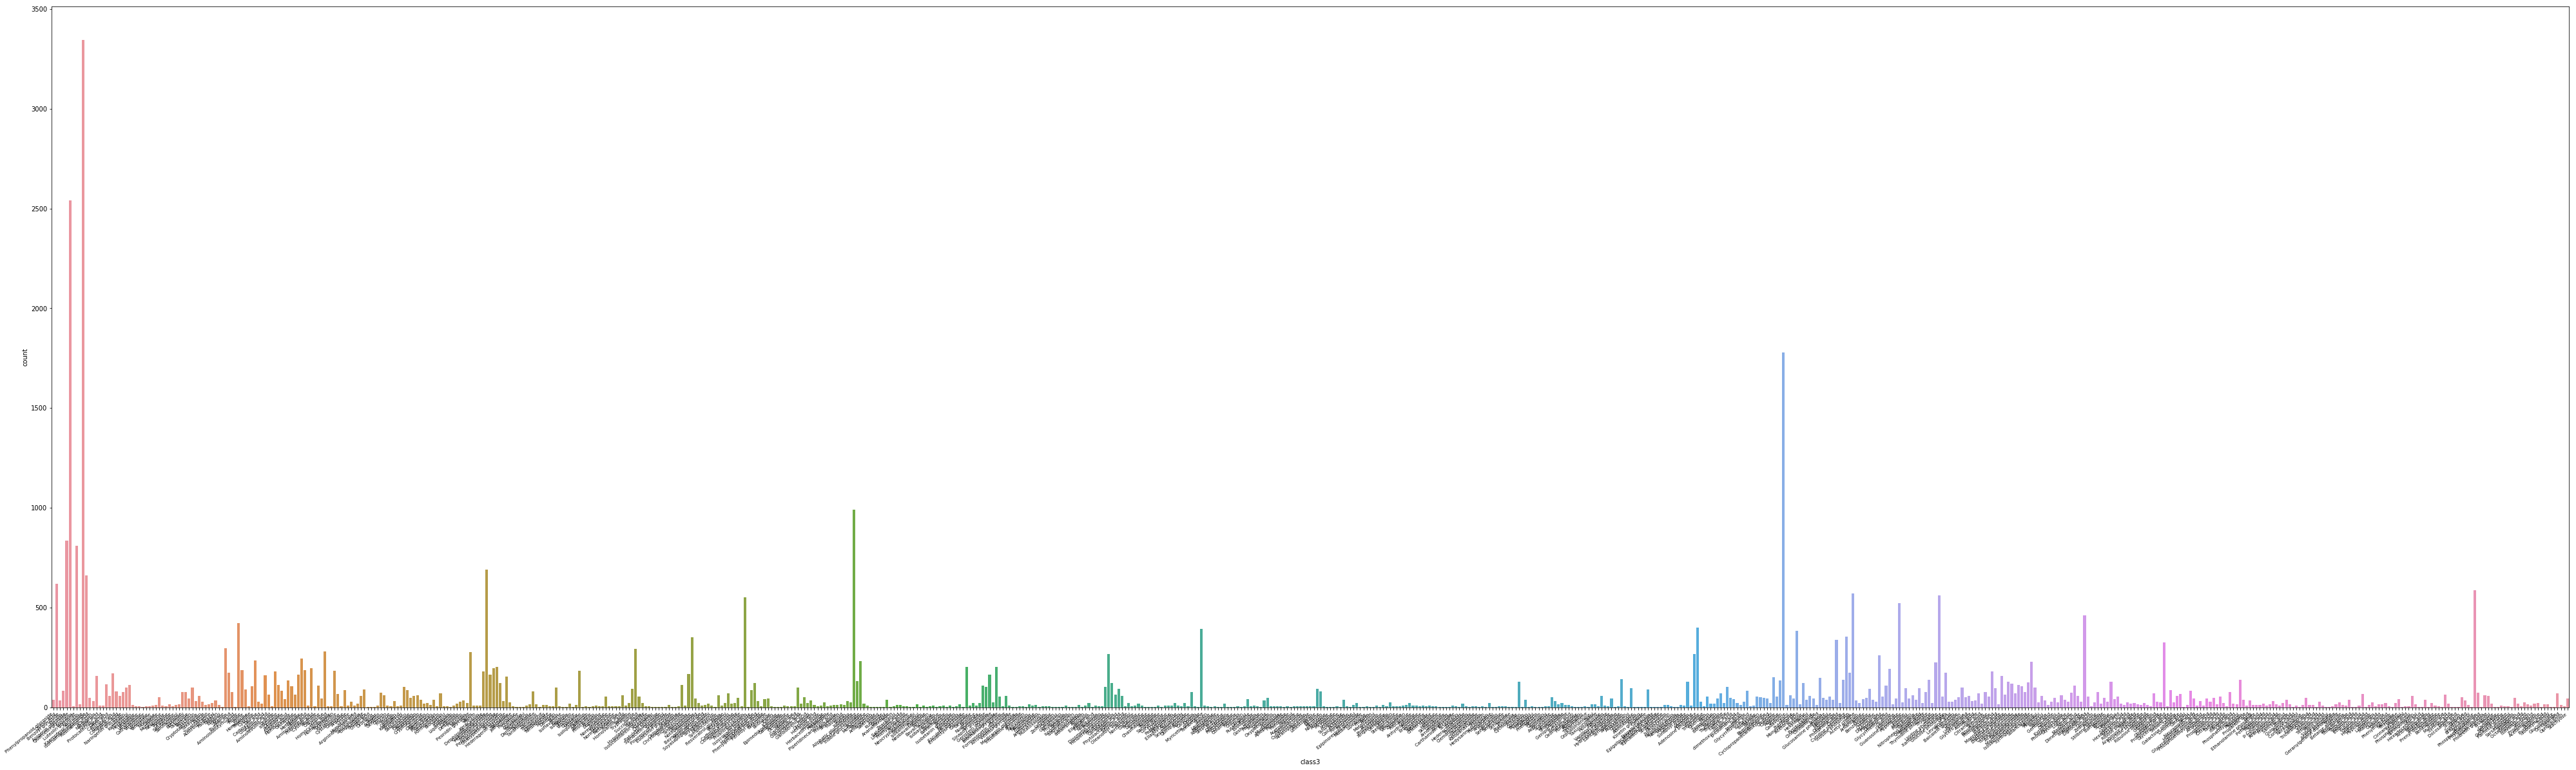

In [8]:
fig, ax = plt.subplots(figsize=(70,20))
ax = sns.countplot(x="class3", data=features)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7);

In [9]:
print('this data set clearly suffer from class imbalance')

this data set clearly suffer from class imbalance


In [14]:
print('Using simpler metrics like accuracy_score can be misleading.','\n'  
      'In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class','\n'   
      'without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.','\n'  
      'Let\'s do this experiment, using simple cross-validation and no feature engineering:')



Using simpler metrics like accuracy_score can be misleading. 
In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class 
without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory. 
Let's do this experiment, using simple cross-validation and no feature engineering:


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


drop = ['class1', 'class2', 'class3', 'ACCESSION', 'AC_mode']
X = features.drop(drop, axis =1)
y = features.class3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.62%


In [18]:
print('Now let\'s run the same code using only one feature which should drastically reduce the accuracy of the classifier:')

Now let's run the same code using only one feature which should drastically reduce the accuracy of the classifier:


In [17]:
model = XGBClassifier()
model.fit(X_train[['peak_mz']], y_train)
y_pred = model.predict(X_test[['peak_mz']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 21.18%


In [31]:
print('As we can see, the high accuracy rate was not an illusion for XGBC classifier.')

As we can see, the high accuracy rate was not an illusion for XGBC classifier.


In [23]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, #min number of data points allowed in a leaf node
                                       min_samples_split = 2, #min number of data points placed in a node before the node is split  
                                       n_estimators=100, #number of trees in the foreset
                                       max_features='auto', #max number of features considered for splitting a node
                                       oob_score=True, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.21 %


In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, #min number of data points allowed in a leaf node
                                       min_samples_split = 2, #min number of data points placed in a node before the node is split  
                                       n_estimators=100, #number of trees in the foreset
                                       max_features='auto', #max number of features considered for splitting a node
                                       oob_score=True, 
                                       n_jobs=-1)

random_forest.fit(X_train[['peak_mz']], y_train)
Y_prediction = random_forest.predict(X_test[['peak_mz']])

random_forest.score(X_train[['peak_mz']], y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 25.26 %


In [30]:
print('Same for random forest classifier.', '\n'
      'Is this data really unbalanced?.', '\n'
      'In this way, the choice of the metric used in unbalanced datasets is extremely important.')

Same for random forest classifier. 
Is this data really unbalanced?. 
In this way, the choice of the metric used in unbalanced datasets is extremely important.
